# Economic Effects of ASEAN Integration on Household Living Standards

## Abstract
In recent decades, Southeast Asian countries are moving toward a more integrated regional economy. The wide development gap and asymmetric impacts among countries highlight the importance of studying integration effects for individual member states. However, the reality of limited data among these countries and multilevel data structure cause severe problems for conventional estimation methods. In this research, we demonstrate the **hierarchical Bayesian model with non-centered parameterization** to analyze the impacts of economic integration and the intermediate effects of domestic infrastructures. The results verify previous research showing “the rich get richer and the poor get poorer” during the integration process. More advanced economies in the region benefit from more connected trade relationships and the inflow of migrant workers. In contrast, less developed countries suffer from the outflow of capitals and brain drain. However, we also find promising evidence that governments can improve living standards through developing information communication technology infrastructures, which can facilitate additional positive contribution toward living standards during the process of integration. 

## Contents
<br/>
<font size="4">
1. Methods / Model Specification<br/><br/>
2. Data Structure<br/><br/>
3. Exploratory Data Analysis<br/><br/>
4. Model processing: Non-Centered Parameterization Model with Stan<br/><br/>
5. Estimation Results <br/><br/>
6. Results Evaluation<br/><br/>
7. Implications<br/><br/>
8. Conclusions<br/><br/>
</font>

## 1. Methods & Model Specification
- Hierarchical Bayesian model
Hierarchical Bayesian model use several hierarchical model to capture complex sources of variance. For example, every counrty has its own unique effect size (or effect distribution) for economic integration. Besides, since domestic infrastructure built in Southeast Asia are mostly used as tools to connect with neighbor countries in the region, the growth effect created by infrastructure in Southeast Asia countries has similar pattern. Therefore, we can construct a hierarchical model like below:<br/>
<img src="https://drive.google.com/uc?export=view&id=1qT-MhJxJbURyrhIF44mNmu_jGEe115yZ"  width="600" height="600">

For the 2nd layer of model, we adopt with non-centered parameterization, which can be illustrated as below:<br/>
<img src="https://drive.google.com/uc?export=view&id=1tPSs-ENLPVS_L9FROR1BAC9VOhF9Ejer"  width="800" height="800">




## 2. Data Structure

In [1]:
import pystan
import pickle
import numpy as np
import arviz as az
import pandas as pd
import seaborn as sns
import statsmodels.api as statmod
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML
from math import pi

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 5000)
df = pd.read_excel("C:\\Users\\steve\\Google Drive\\Research\\data\\Succinct Version_V42.xlsx")
df.shape

(70, 19)

In [3]:
df

,Country,Country_Code,Year,Food_Share,Intercept,intra-ASEAN export ratio,intra-ASEAN import ratio,intra-ASEAN FDI_percentage,Migration ratio(ASEAN/World),debt_ratio,income per cap_annual%growth,income per capita_USD,inflation rate,unemployment rate,GDP growth rate,Financial Development Index,Avg School Yr of Labor Force,Logistic Performance Index,ICT Development Index
0,Cambodia,0,2013,46.684951,1,0.127326,0.528275,-0.000013,0.920810,32.050,7.478900,7.478900,2.942600,4.336,7.427848,0.129240,4.968000,2.390562,20.743238
1,Cambodia,0,2014,44.007176,1,0.113931,0.510016,0.000157,0.920811,32.260,-0.211602,-0.211602,3.855239,4.049,7.071482,0.139666,5.124000,2.583333,23.703177
2,Cambodia,0,2015,43.600295,1,0.123130,0.497781,0.000397,0.920812,32.540,4.410326,4.410326,1.221270,4.514,7.036235,0.146594,5.280000,2.473126,20.735912
3,Cambodia,0,2016,42.790198,1,0.154524,0.481518,-0.000065,0.920795,29.100,5.212943,5.212943,3.045415,4.301,6.882465,0.153885,5.523333,2.362919,28.224255
4,Cambodia,0,2017,42.507479,1,0.114615,0.505080,0.000131,0.920778,30.000,4.349766,4.349766,2.890925,4.185,7.163650,0.160594,5.766667,2.253732,28.940929
5,Cambodia,0,2018,42.332431,1,0.089322,0.537452,0.000276,0.920762,29.400,4.683775,4.683775,2.457965,4.511,7.497964,0.160194,6.010000,2.144546,32.135009
6,Indonesia,1,2010,33.400000,1,0.211354,0.317994,0.011978,0.151836,24.520,1.033453,1.033453,5.134204,0.771,6.223854,0.296746,8.540000,2.370259,17.925131
7,Indonesia,1,2011,33.660000,1,0.206876,0.323166,0.021568,0.151835,23.110,4.084952,4.084952,5.356048,0.577,6.169784,0.317492,8.644000,2.454188,20.251315
8,Indonesia,1,2012,32.642000,1,0.220123,0.310916,0.054013,0.151834,22.960,3.464227,3.464227,4.279500,0.505,6.030051,0.334522,8.748000,2.538118,24.554635
9,Indonesia,1,2013,32.117332,1,0.222562,0.317575,0.019130,0.151833,24.850,4.215871,4.215871,6.412513,0.438,5.557264,0.355930,8.852000,2.728416,26.084472



<img src="https://drive.google.com/uc?export=view&id=1L8eskvYIZROesRAEz5kds4mvTw2dvR9v"  width="1000" height="800">

## 3. Exploratory Data Analysis
1. Empirical distribution of our y variable, which is the proportion of food expenditure per capita.


INFO:numexpr.utils:NumExpr defaulting to 8 threads.


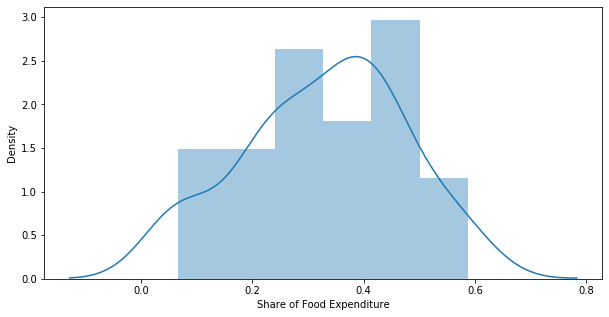

In [4]:
f, ax = plt.subplots(figsize=(10, 5))
s = sns.distplot(df.Food_Share/100)
s.set(xlabel='Share of Food Expenditure')
s.set(ylabel='Density')
plt.show()

2. Trend charts of y
<img src="https://drive.google.com/uc?export=view&id=124sa2Yfd3X98g4EAHmRaDFVp4RXHJK2x"  width="800" height="800">

3. Trend charts of X, which represents integration variables and infrastructure scores.<br/>
<img src="https://drive.google.com/uc?export=view&id=1bSRqCNu5lu9UILJ8qmX2PlRRvbhNq1EM"  width="800" height="1000">

## 4. Model processing: Non-Centered Parameterization Model with Stan

In [5]:
nonCenter_model = """
data {
  int<lower=0> I;           # number of covariate in lower level model
  int<lower=0> J;           # number of covariate in upper level model  
  int<lower=0> N;           # number of observation
  int<lower=0> K;           # number of country
  int<lower=1,upper=K> country[N];
  matrix[K, J] z;           # upper level model的Z的觀察值
  matrix[N, I] x;           # lower level model的X的觀察值
  vector[N] y;              # response variable的觀察值
} 
parameters {
  matrix[J, I] Gamma;       # upper level model的斜率
  matrix[K, I] Delta;       # upper level model的截距
  corr_matrix[I] Omega;     # upper level model correlation matrix (可加可不加，不加的時候transformed那裡的quad_form_diag那項要拿掉，留下Delta[k,]就好)
  vector<lower = 0>[I] tau; # upper level model scale parameters (可加可不加，不加的時候transformed那裡的quad_form_diag那項要拿掉，留下Delta[k,]就好)
  real<lower=0> sigma;      # Variance of the lower level model
} 
transformed parameters {
  matrix[K, I] Beta;        # lower level model的斜率
  for (k in 1:K) {    
    Beta[k,] = z[k,] * Gamma + Delta[k,] * quad_form_diag(Omega,tau);
  }
}
model {
  // Hyperpriors
  for (j in 1:J) {
    Gamma[j,] ~ normal(0, 5);
  }
  Omega ~ lkj_corr(2);
  tau ~ normal(0, 5);       
  sigma ~ gamma(0.01, 0.01);

  // Non-centered population model and likelihood.
  for (k in 1:K) {
    Delta[k,] ~ normal(0, 1); # 每個國家在upper level上都有自己的variation，用standard normal distribution捕捉
  }

  for (n in 1:N) {
    y[n] ~ normal(x[n,] * Beta[country[n],]', sigma);
  }
}
"""

In [6]:
nonCenter_data = {'N': df.shape[0],
                  'I': 5,
                  'J': 4,
                  'K': len(df.Country.unique()),
                  'country': df.Country_Code.values +1, # Stan counts starting at 1
                  'x': np.array(df.iloc[:, 4:9]),
                  'z': np.array([list(df[df['Country_Code']==country_code].iloc[:,15:].mean()) for country_code in range(0,9)]), #將各個國家upper level在各個指標上的data各自平均，成為一個9x4的矩陣
                  'y': df.Food_Share.values}

nonCenter_fit = pystan.stan(model_code=nonCenter_model, data=nonCenter_data, iter=5000, chains=4, control=dict(adapt_delta=0.99,max_treedepth=15))

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_52a1a96ad82ec2618acad3795040fce5 NOW.


## 5. Estimation Results 

In [7]:
print(nonCenter_fit)

Inference for Stan model: anon_model_52a1a96ad82ec2618acad3795040fce5.
4 chains, each with iter=5000; warmup=2500; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
Gamma[1,1]  -0.26    0.03   4.97  -9.98  -3.58  -0.25   3.09   9.48  20657    1.0
Gamma[2,1]   7.75    0.05   3.16   0.94   5.82   7.93   9.84  13.47   4654    1.0
Gamma[3,1]   5.44    0.05   5.07  -4.39   1.96    5.5   8.87  15.37   9523    1.0
Gamma[4,1]  -1.16    0.02   0.91  -2.76  -1.78  -1.23  -0.62   0.84   3512    1.0
Gamma[1,2]  -0.45    0.03   4.93  -9.98  -3.75  -0.47   2.86    9.2  22964    1.0
Gamma[2,2]  -2.12    0.06   4.37 -10.55  -5.08  -2.17   0.77   6.56   6208    1.0
Gamma[3,2]  -0.27    0.04   4.91   -9.8  -3.61  -0.21   3.09   9.22  16709    1.0
Gamma[4,2]   0.07    0.02   1.12   -2.2  -0.65   0.09   0.81   2.25   5519    1.0
Gamma[1,3]  -0.35    0.04   5.06 -10.18  -3.74  -0.33   2.99   9.62  196

## 6. Results Evaluation

<font size="4">Gamma (Upper-level covariates)</font>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AA64B69BE0>,
      dtype=object)

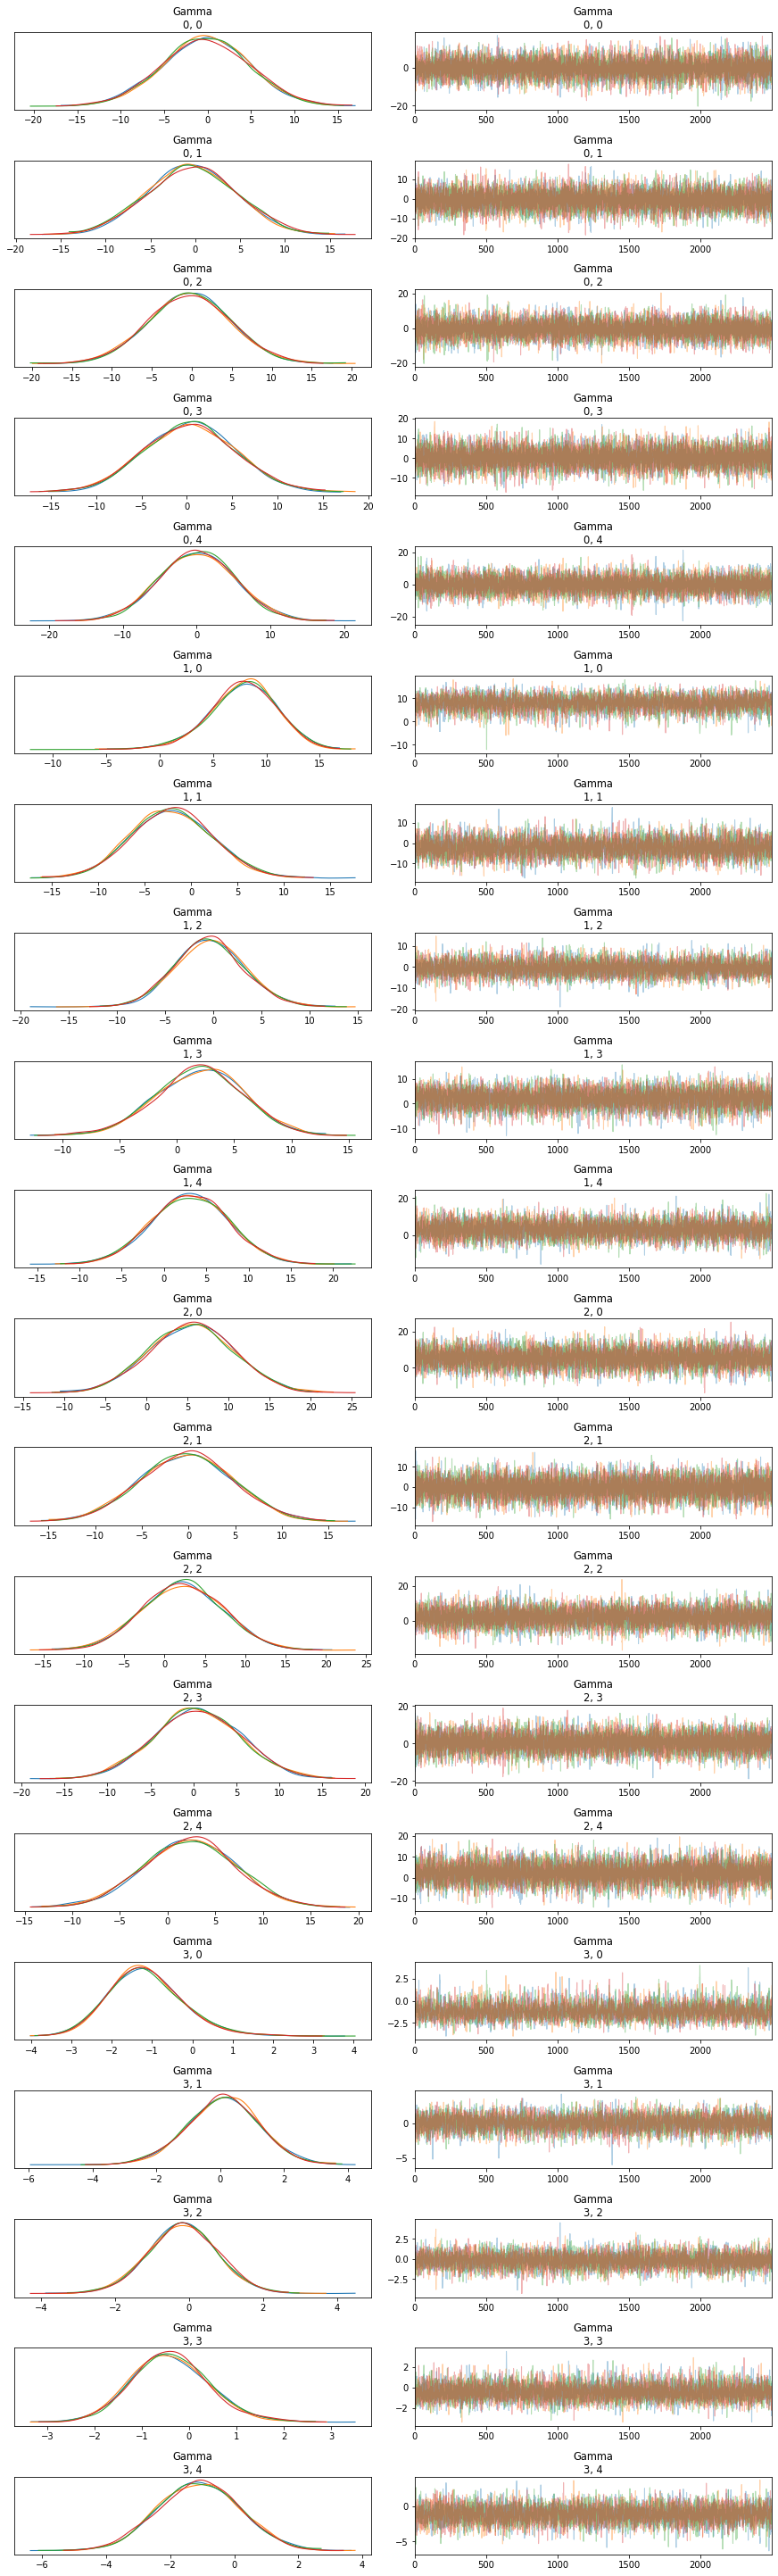

In [9]:
az.plot_trace(nonCenter_fit,var_names=["Gamma"])

INFO:numba.transforms:finding looplift candidates


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001AA67892D30>],
      dtype=object)

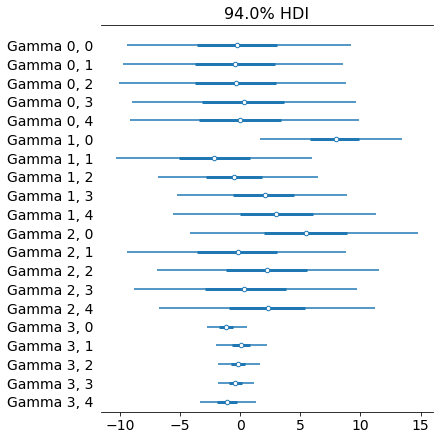

In [11]:
az.plot_forest(az_data, kind='forestplot',var_names=['Gamma'], combined = True)

<font size="4">Beta (Lower-level covariates)</font>

C:\ProgramData\Anaconda3\lib\site-packages\arviz\plots\traceplot.py:254: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (45), generating only 20 plots
  UserWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AA72B65F60>,
      dtype=object)

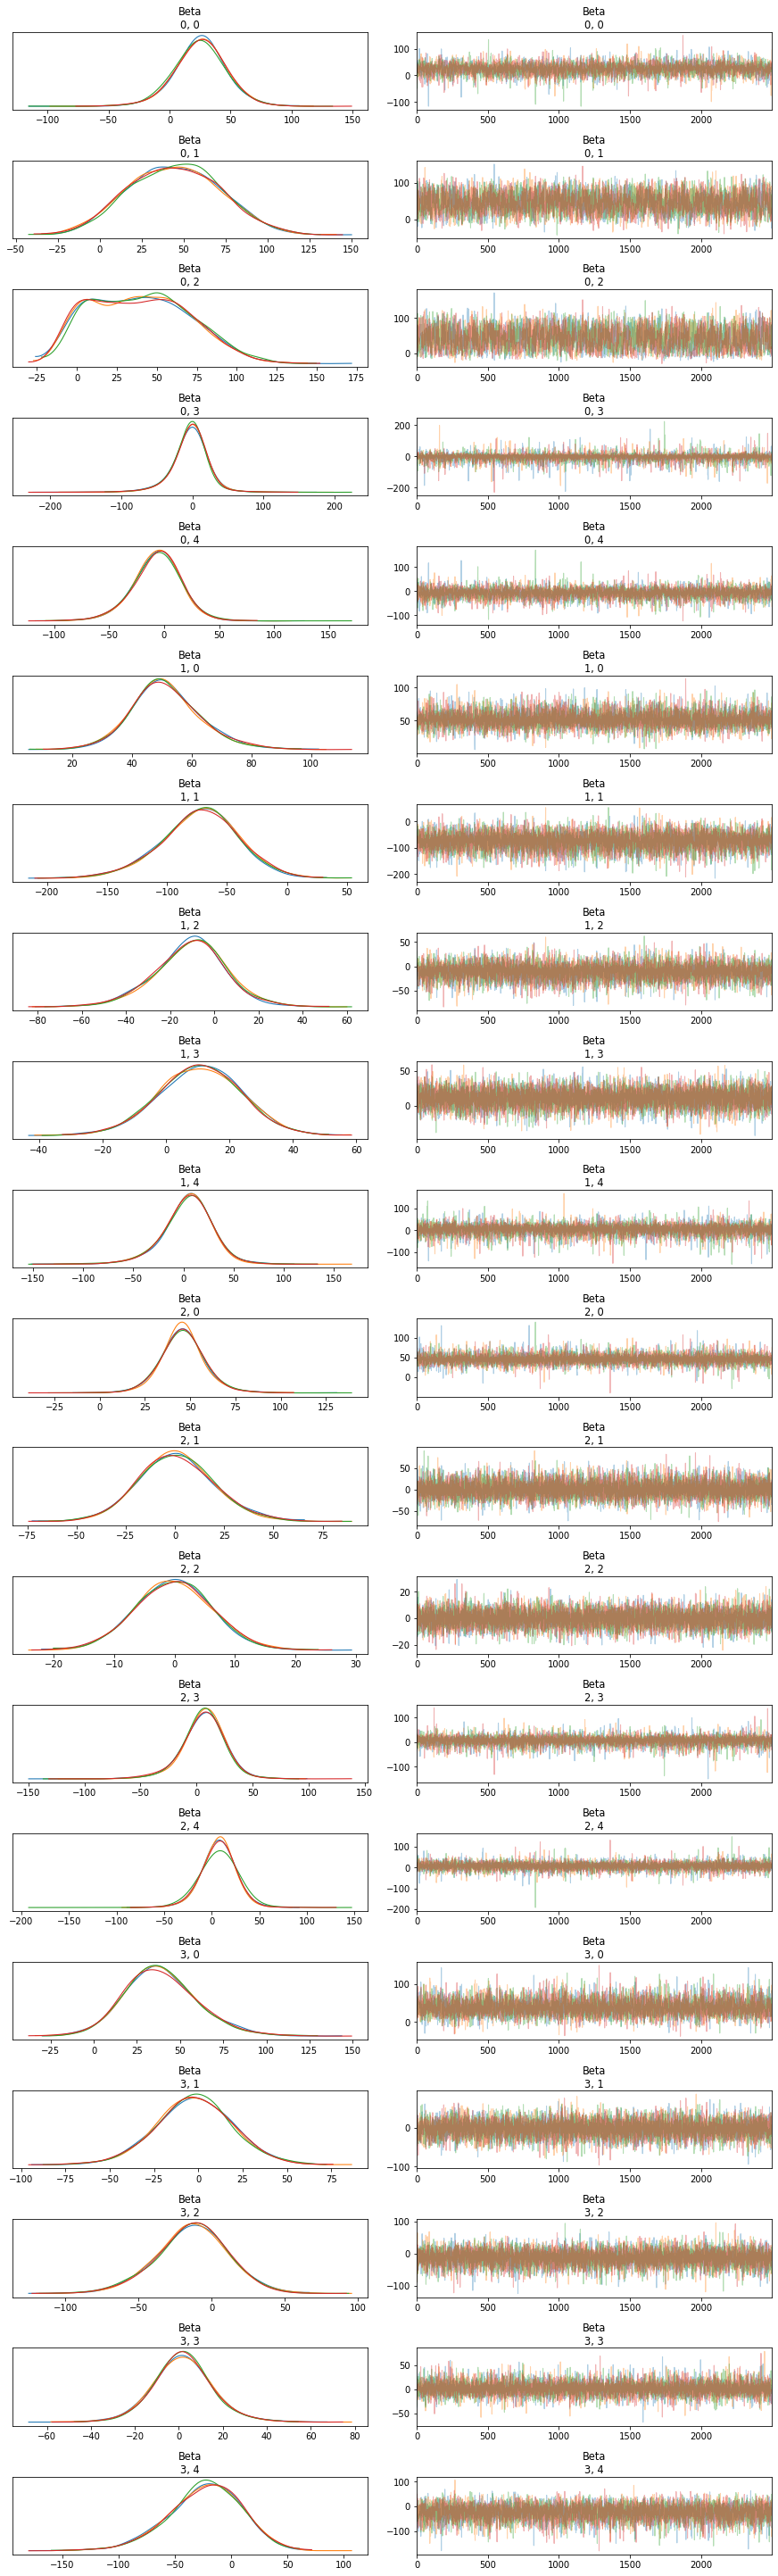

In [12]:
az.plot_trace(nonCenter_fit,var_names=["Beta"])

INFO:numba.transforms:finding looplift candidates


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001AA6BD7AEB8>],
      dtype=object)

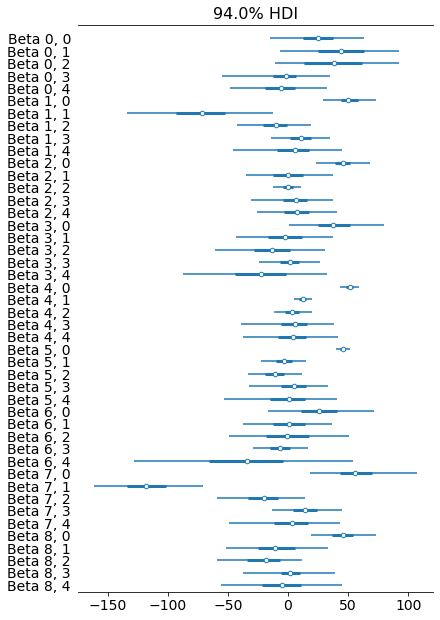

In [14]:
az.plot_forest(az_data, kind='forestplot',var_names=['Beta'], combined = True)

<font size="4">Omega (Correlation between lower-level covariates)</font>

C:\ProgramData\Anaconda3\lib\site-packages\arviz\plots\traceplot.py:254: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (25), generating only 20 plots
  UserWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AA7A41ACC0>,
      dtype=object)

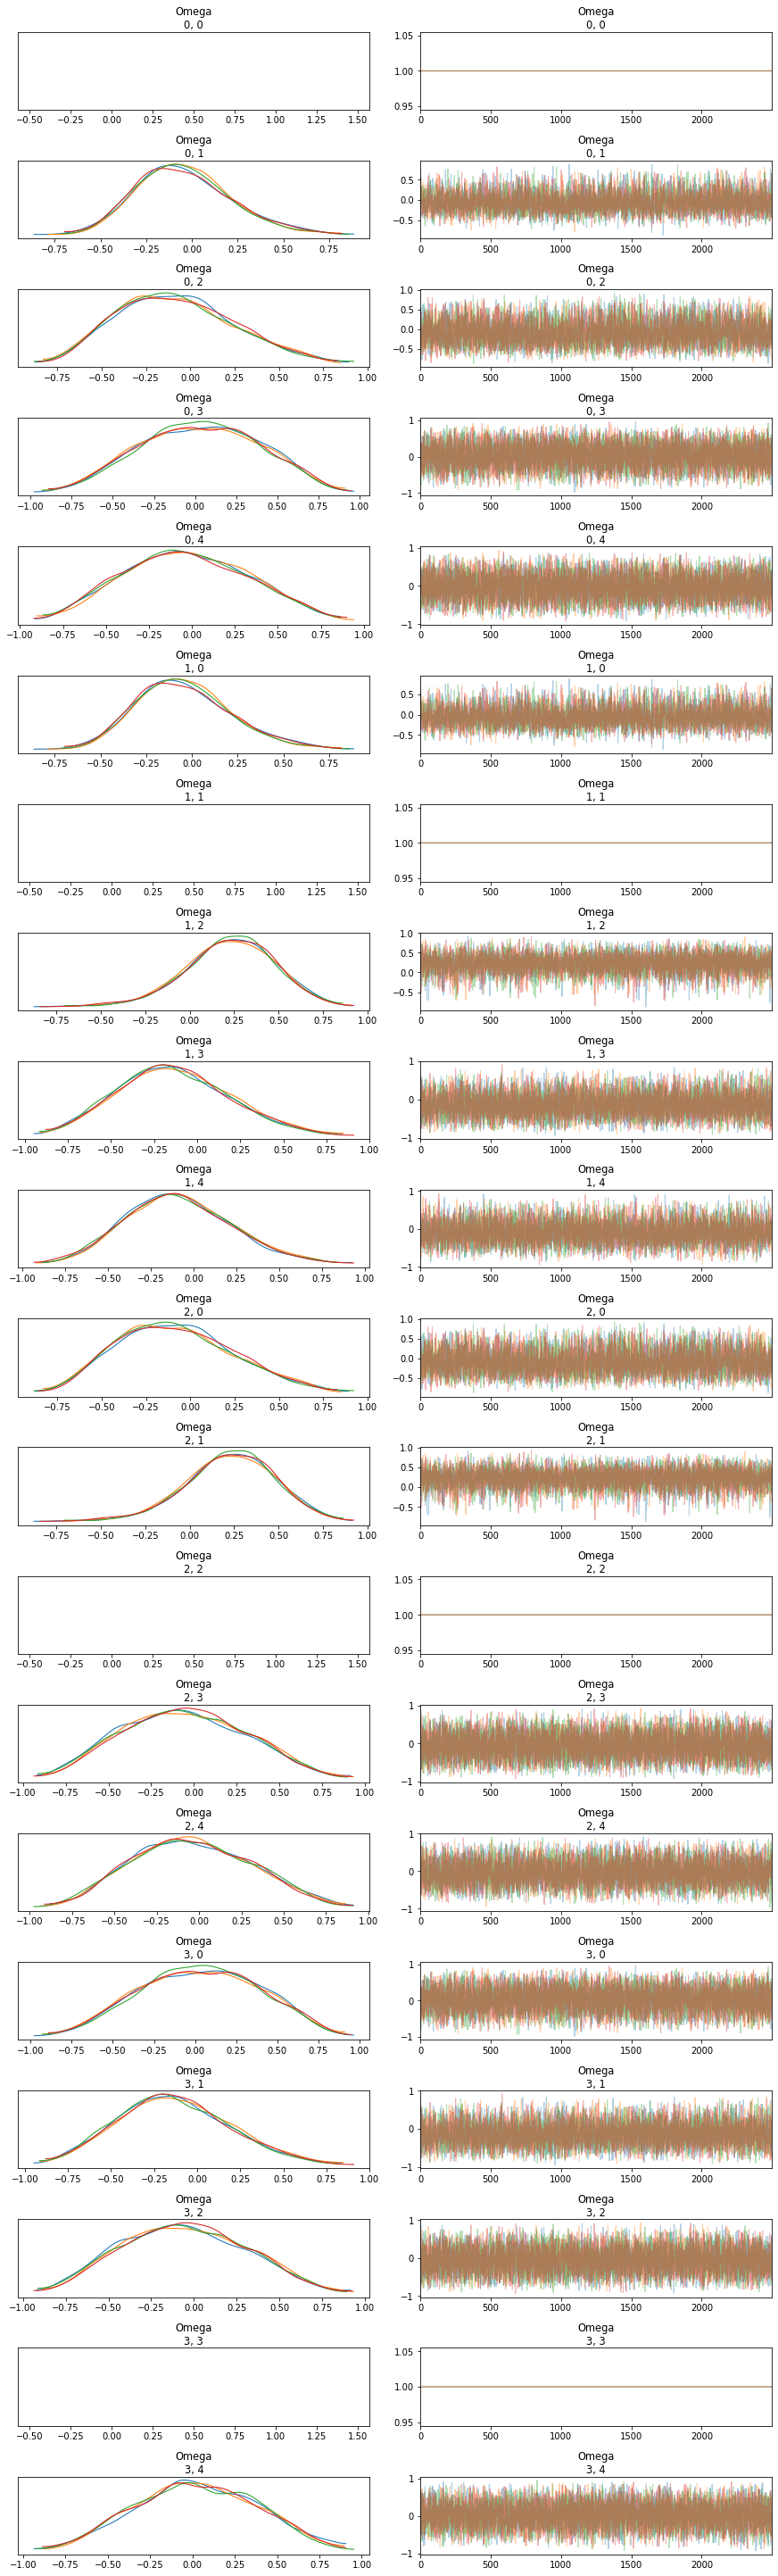

In [15]:
az.plot_trace(nonCenter_fit,var_names=["Omega"])

INFO:numba.transforms:finding looplift candidates


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001AA06B58470>],
      dtype=object)

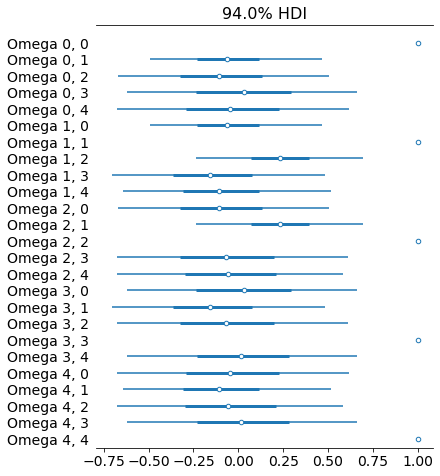

In [17]:
az.plot_forest(az_data, kind='forestplot',var_names=['Omega'], combined = True)

<font size="4">Tau (Scale parameter of the covariance decomposition in the upper-level model)</font>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AA05DC1630>,
      dtype=object)

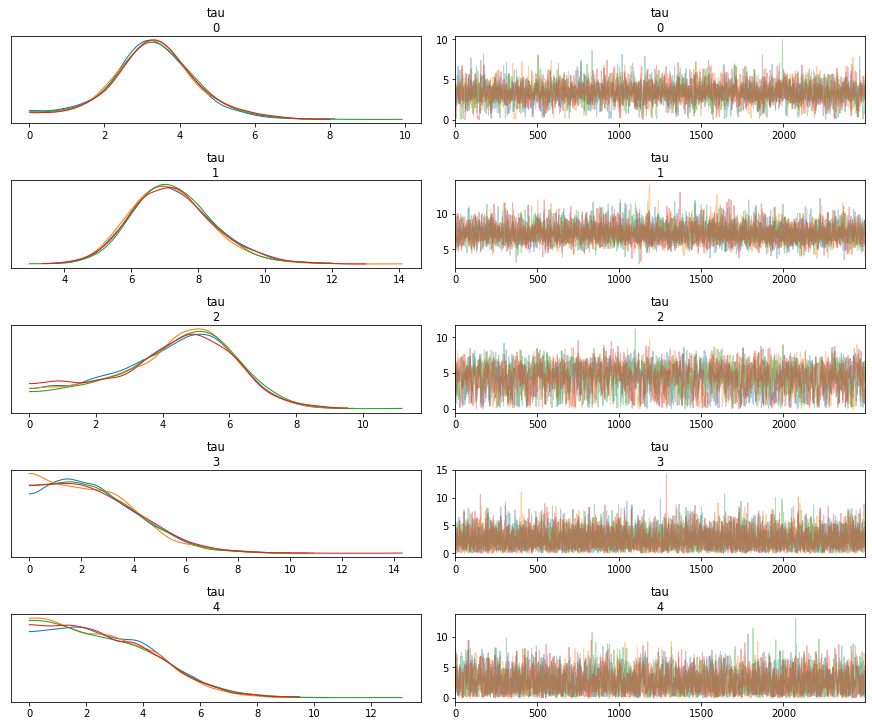

In [18]:
az.plot_trace(nonCenter_fit,var_names=["tau"])

INFO:numba.transforms:finding looplift candidates


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001AA0685A2E8>],
      dtype=object)

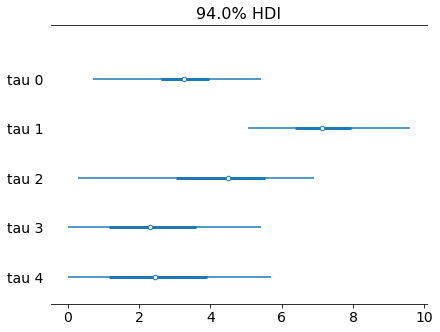

In [20]:
az.plot_forest(az_data, kind='forestplot',var_names=['tau'], combined = True)

<font size="4">Sigma (Variance of the lower-level model)</font>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AA0862C4A8>,
      dtype=object)

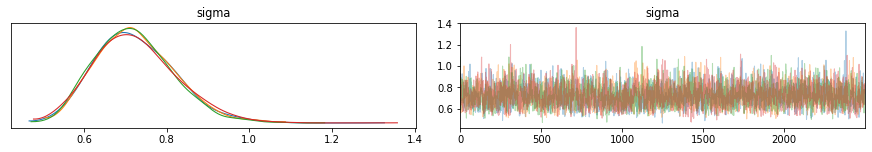

In [21]:
az.plot_trace(nonCenter_fit,var_names=["sigma"])

INFO:numba.transforms:finding looplift candidates


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001AA0A5EE438>],
      dtype=object)

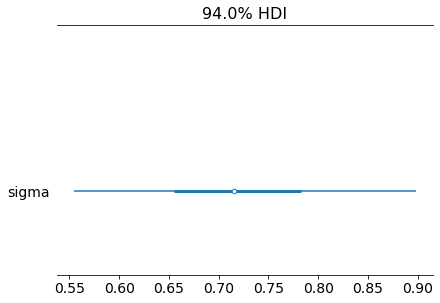

In [23]:
az.plot_forest(az_data, kind='forestplot',var_names=['sigma'], combined = True)

## 7. Implications

<img src="https://drive.google.com/uc?export=view&id=1jP7eP5JO8bN6vVSz8sFBOQ6LH0Fn9mgx"  width="1000" height="800">

<img src="https://drive.google.com/uc?export=view&id=1lWCixcIPjkGcxXhnlb1neQWBg0DiDlUm"  width="1000" height="800">

<img src="https://drive.google.com/uc?export=view&id=1ZfE3VupgATHDRVx31egoQYkFW2WyWs6D"  width="1000" height="800">

<img src="https://drive.google.com/uc?export=view&id=1qzIzo35-T6huV2VHs1seJD0LLpBUcaNK"  width="1000" height="800">

<img src="https://drive.google.com/uc?export=view&id=11NNCzzHS1yCBBe5iQj0dl7O9ie68nIRM"  width="1000" height="800">

## 8. Conclusions
<img src="https://drive.google.com/uc?export=view&id=1wm9Xork_myamiMuDgADj6r75vreyOW2l"  width="1000" height="800">